In [17]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Roles per job

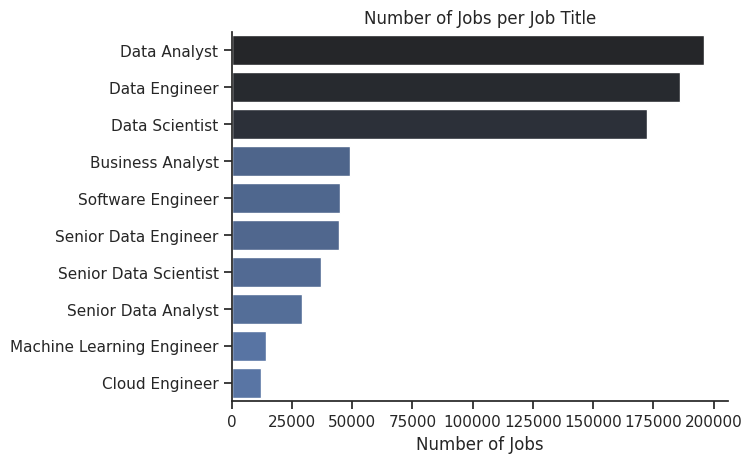

In [18]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Jobs per country

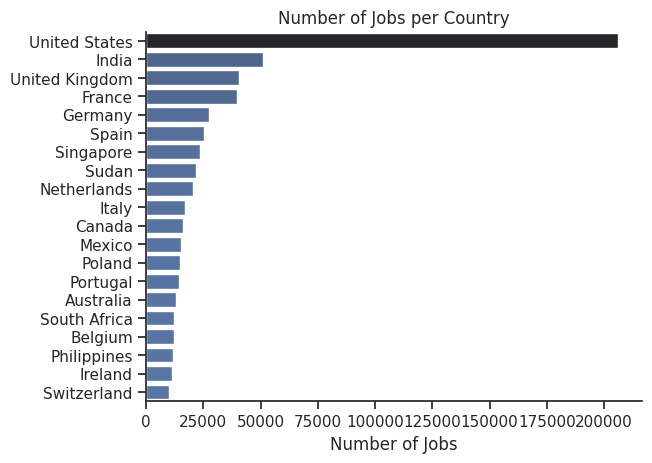

In [19]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Jobs according to company

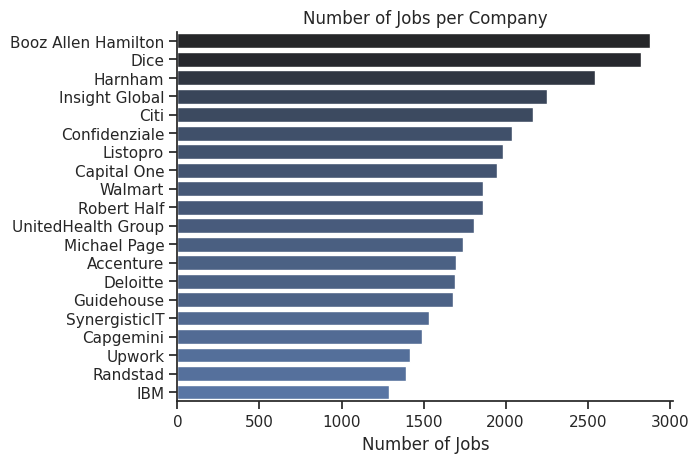

In [20]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Jobs opportunities

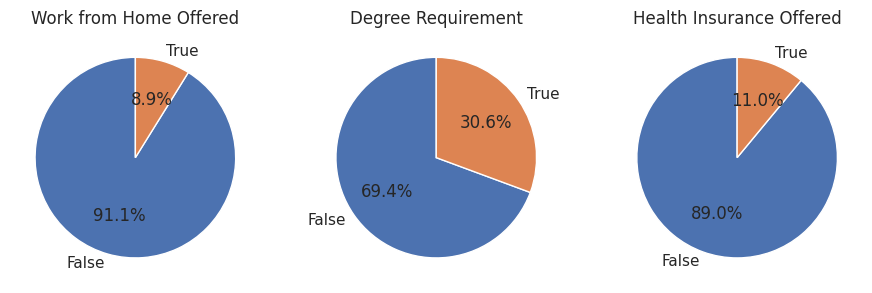

In [21]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### Data Analyst Roles in India

In [22]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

### Data Analyst Roles in India according to location

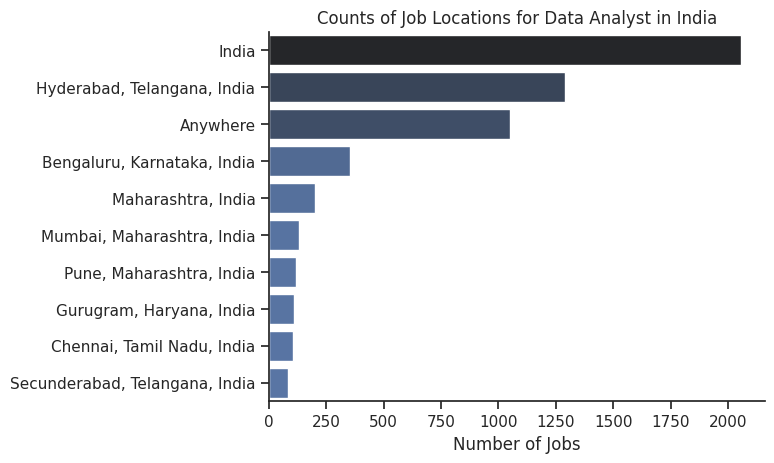

In [23]:
df_plot = df_DA_IND['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Data Analyst Roles in India according to company

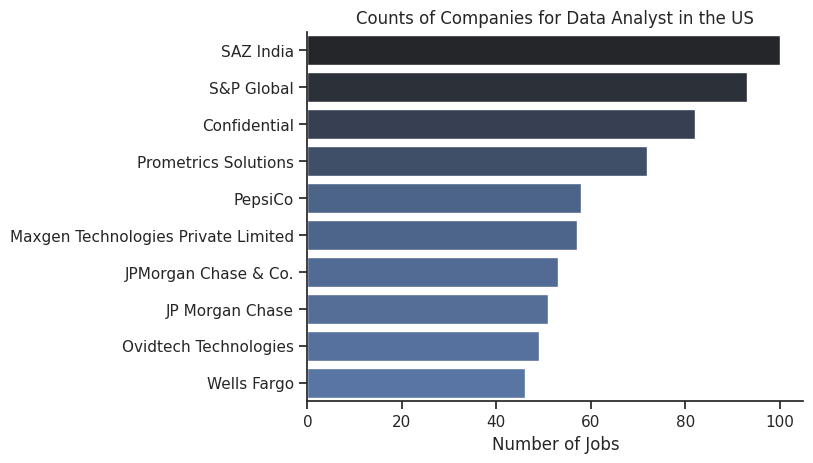

In [24]:
df_plot = df_DA_IND['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()